**Import all the libraries :**

In [87]:
# !pip install bs4

In [1]:
import os
import re
import cv2
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from tqdm import tqdm
sns.set_style("whitegrid")
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')
import xml.etree.ElementTree as ET
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
cwd = os.getcwd()
cwd

'/kaggle/working'

In [3]:
import pandas as pd 
images_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/"
df  =pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")
df2 = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")
df2 = df2[df2['projection']=='Frontal']
df  =pd.merge(df,df2,  on=['uid'])
df

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png,Frontal
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,Frontal
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,5_IM-2117-1003002.dcm.png,Frontal
...,...,...,...,...,...,...,...,...,...,...
3813,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...,3995_IM-2046-1001.dcm.png,Frontal
3814,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,3996_IM-2047-1001.dcm.png,Frontal
3815,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB.",3997_IM-2048-1001.dcm.png,Frontal
3816,3998,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.,3998_IM-2048-1001.dcm.png,Frontal


In [4]:
df = df[['filename', 'Problems']]
df

,filename,Problems
0,1_IM-0001-4001.dcm.png,normal
1,2_IM-0652-1001.dcm.png,Cardiomegaly;Pulmonary Artery
2,3_IM-1384-1001.dcm.png,normal
3,4_IM-2050-1001.dcm.png,"Pulmonary Disease, Chronic Obstructive;Bullous..."
4,5_IM-2117-1003002.dcm.png,Osteophyte;Thickening;Lung
...,...,...
3813,3995_IM-2046-1001.dcm.png,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...
3814,3996_IM-2047-1001.dcm.png,Spine
3815,3997_IM-2048-1001.dcm.png,Opacity;Granuloma
3816,3998_IM-2048-1001.dcm.png,normal


In [5]:
# sort the values in the 'Problems' column
df['Problems'] = df['Problems'].str.split('[,;]').apply(sorted).str.join(',')

df


,filename,Problems
0,1_IM-0001-4001.dcm.png,normal
1,2_IM-0652-1001.dcm.png,"Cardiomegaly,Pulmonary Artery"
2,3_IM-1384-1001.dcm.png,normal
3,4_IM-2050-1001.dcm.png,"Chronic Obstructive,Bullous Emphysema,Cicatri..."
4,5_IM-2117-1003002.dcm.png,"Lung,Osteophyte,Thickening"
...,...,...
3813,3995_IM-2046-1001.dcm.png,"Cicatrix,Diaphragm,Lung,Pulmonary Atelectasis,..."
3814,3996_IM-2047-1001.dcm.png,Spine
3815,3997_IM-2048-1001.dcm.png,"Granuloma,Opacity"
3816,3998_IM-2048-1001.dcm.png,normal


In [6]:
# First, split the 'Problems' column on commas and semicolons, and sort the resulting lists
df['Problems'] = df['Problems'].str.split('[,;]').apply(sorted)

# Create a new column for each unique value in the 'Problems' column
problem_columns = set(problem for problems in df['Problems'] for problem in problems)
for problem in problem_columns:
    df[problem] = 0

# Assign a value of 1 to each row-column combination where the problem appears
for i, problems in enumerate(df['Problems']):
    for problem in problems:
        df.at[i, problem] = 1


In [7]:
df

,filename,Problems,Surgical Instruments,Aortic Aneurysm,Calcinosis,Hiatal,Cysts,Emphysema,Hyperostosis,Breast Implants,...,Calcified Granuloma,Sutures,Shift,Cervical Vertebrae,Fibrosis,Subcutaneous Emphysema,Contrast Media,Nipple Shadow,Pulmonary Emphysema,Hydropneumothorax
0,1_IM-0001-4001.dcm.png,[normal],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2_IM-0652-1001.dcm.png,"[Cardiomegaly, Pulmonary Artery]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3_IM-1384-1001.dcm.png,[normal],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4_IM-2050-1001.dcm.png,"[ Chronic Obstructive, Bullous Emphysema, Cica...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5_IM-2117-1003002.dcm.png,"[Lung, Osteophyte, Thickening]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,3995_IM-2046-1001.dcm.png,"[Cicatrix, Diaphragm, Lung, Pulmonary Atelecta...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3814,3996_IM-2047-1001.dcm.png,[Spine],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3815,3997_IM-2048-1001.dcm.png,"[Granuloma, Opacity]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3816,3998_IM-2048-1001.dcm.png,[normal],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.loc[3].head(30)


filename                                               4_IM-2050-1001.dcm.png
Problems                    [ Chronic Obstructive, Bullous Emphysema, Cica...
Surgical Instruments                                                        0
Aortic Aneurysm                                                             0
Calcinosis                                                                  0
 Hiatal                                                                     0
Cysts                                                                       0
Emphysema                                                                   0
Hyperostosis                                                                0
Breast Implants                                                             0
Pulmonary Disease                                                           1
Pneumothorax                                                                0
Implanted Medical Device                                        

In [9]:
df.columns

Index(['filename', 'Problems', 'Surgical Instruments', 'Aortic Aneurysm',
       'Calcinosis', ' Hiatal', 'Cysts', 'Emphysema', 'Hyperostosis',
       'Breast Implants',
       ...
       'Calcified Granuloma', 'Sutures', 'Shift', 'Cervical Vertebrae',
       'Fibrosis', 'Subcutaneous  Emphysema', 'Contrast Media',
       'Nipple Shadow', 'Pulmonary Emphysema', 'Hydropneumothorax'],
      dtype='object', length=130)

In [10]:
df.shape

(3818, 130)

In [11]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")
df.head()

Number of rows in data = 3818
Number of columns in data = 130


**Sample data:**


,filename,Problems,Surgical Instruments,Aortic Aneurysm,Calcinosis,Hiatal,Cysts,Emphysema,Hyperostosis,Breast Implants,...,Calcified Granuloma,Sutures,Shift,Cervical Vertebrae,Fibrosis,Subcutaneous Emphysema,Contrast Media,Nipple Shadow,Pulmonary Emphysema,Hydropneumothorax
0,1_IM-0001-4001.dcm.png,[normal],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2_IM-0652-1001.dcm.png,"[Cardiomegaly, Pulmonary Artery]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3_IM-1384-1001.dcm.png,[normal],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4_IM-2050-1001.dcm.png,"[ Chronic Obstructive, Bullous Emphysema, Cica...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5_IM-2117-1003002.dcm.png,"[Lung, Osteophyte, Thickening]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

filename                   0
Problems                   0
Surgical Instruments       0
Aortic Aneurysm            0
Calcinosis                 0
                          ..
Subcutaneous  Emphysema    0
Contrast Media             0
Nipple Shadow              0
Pulmonary Emphysema        0
Hydropneumothorax          0
Length: 130, dtype: int64


In [13]:
categories = list(df.columns.values)
categories = categories[:]
print(categories)

['filename', 'Problems', 'Surgical Instruments', 'Aortic Aneurysm', 'Calcinosis', ' Hiatal', 'Cysts', 'Emphysema', 'Hyperostosis', 'Breast Implants', 'Pulmonary Disease', 'Pneumothorax', 'Implanted Medical Device', 'Pleura', 'Mass', 'Mediastinum', 'Sarcoidosis', 'Scoliosis', 'Pneumonectomy', ' Metabolic', 'Pleural Effusion', 'Fractures', 'Adipose Tissue', 'Pulmonary Edema', 'No Indexing', 'Spinal Fusion', 'Pericardial Effusion', 'Lymph Nodes', 'Aorta', 'Hemothorax', 'Technical Quality of Image Unsatisfactory ', 'Hernia', 'Volume Loss', 'Hypertension', 'Pulmonary Atelectasis', 'Osteophyte', 'Hemopneumothorax', 'normal', 'Colonic Interposition', 'Trachea', 'Cavitation', 'Atherosclerosis', 'Thoracic vertebrae', ' Chronic Obstructive', 'Bronchiectasis', 'Stents', 'Pneumoperitoneum', 'Heart Atria', 'Tuberculosis', 'Arthritis', 'Lung', 'Pulmonary Congestion', 'Consolidation', 'Cicatrix', 'Ribs', 'Pneumonia', ' Carina', 'Granuloma', 'Sulcus', 'Heart Failure', 'Nodule', 'Epicardial Fat', ' Dia

In [14]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['Keywords', 'number of accurances'])
df_stats

,Keywords,number of accurances
0,filename,1_IM-0001-4001.dcm.png2_IM-0652-1001.dcm.png3_...
1,Problems,"[normal, Cardiomegaly, Pulmonary Artery, norma..."
2,Surgical Instruments,94
3,Aortic Aneurysm,5
4,Calcinosis,290
...,...,...
125,Subcutaneous Emphysema,1
126,Contrast Media,3
127,Nipple Shadow,9
128,Pulmonary Emphysema,41


In [15]:
data = df
data = df.loc[np.random.choice(df.index, size=3818)]
data.shape

(3818, 130)

In [16]:
data.head()

,filename,Problems,Surgical Instruments,Aortic Aneurysm,Calcinosis,Hiatal,Cysts,Emphysema,Hyperostosis,Breast Implants,...,Calcified Granuloma,Sutures,Shift,Cervical Vertebrae,Fibrosis,Subcutaneous Emphysema,Contrast Media,Nipple Shadow,Pulmonary Emphysema,Hydropneumothorax
362,374_IM-1868-1001.dcm.png,"[Cardiomegaly, Infiltrate, Pleural Effusion, P...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3239,3407_IM-1647-1001.dcm.png,"[Calcified Granuloma, Thoracic Vertebrae]",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2726,2867_IM-1274-1001.dcm.png,"[Deformity, Density, Lucency, Pulmonary Emphys...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
434,450_IM-2082-1001.dcm.png,[normal],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,300_IM-1385-1001.dcm.png,"[ Chronic Obstructive, Calcified Granuloma, Fu...",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
data = data.drop(['Problems', 'normal'], axis=1)
data 

,filename,Surgical Instruments,Aortic Aneurysm,Calcinosis,Hiatal,Cysts,Emphysema,Hyperostosis,Breast Implants,Pulmonary Disease,...,Calcified Granuloma,Sutures,Shift,Cervical Vertebrae,Fibrosis,Subcutaneous Emphysema,Contrast Media,Nipple Shadow,Pulmonary Emphysema,Hydropneumothorax
362,374_IM-1868-1001.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3239,3407_IM-1647-1001.dcm.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2726,2867_IM-1274-1001.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
434,450_IM-2082-1001.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,300_IM-1385-1001.dcm.png,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,815_IM-2346-1001.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1333,1386_IM-0246-1001.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370,3541_IM-1733-0001-0002.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2538,2668_IM-1147-3001.dcm.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data['filename']

362           374_IM-1868-1001.dcm.png
3239         3407_IM-1647-1001.dcm.png
2726         2867_IM-1274-1001.dcm.png
434           450_IM-2082-1001.dcm.png
289           300_IM-1385-1001.dcm.png
                     ...              
789           815_IM-2346-1001.dcm.png
1333         1386_IM-0246-1001.dcm.png
3370    3541_IM-1733-0001-0002.dcm.png
2538         2668_IM-1147-3001.dcm.png
688           713_IM-2275-1001.dcm.png
Name: filename, Length: 3818, dtype: object

In [19]:
data['filename'] = '/kaggle/input/chest-xrays-indiana-university/images/images_normalized/' + data['filename'].astype(str)

In [20]:
data

,filename,Surgical Instruments,Aortic Aneurysm,Calcinosis,Hiatal,Cysts,Emphysema,Hyperostosis,Breast Implants,Pulmonary Disease,...,Calcified Granuloma,Sutures,Shift,Cervical Vertebrae,Fibrosis,Subcutaneous Emphysema,Contrast Media,Nipple Shadow,Pulmonary Emphysema,Hydropneumothorax
362,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3239,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2726,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
434,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1333,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2538,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# write the dataframe to a CSV file
data.to_csv('Preprocessed_IU_for_Mulilabel_classification.csv', index=False)

In [22]:
# data = pd.read_csv('Preprocessed_IU_for_Mulilabel_classification.csv')

In [23]:
data

,filename,Surgical Instruments,Aortic Aneurysm,Calcinosis,Hiatal,Cysts,Emphysema,Hyperostosis,Breast Implants,Pulmonary Disease,...,Calcified Granuloma,Sutures,Shift,Cervical Vertebrae,Fibrosis,Subcutaneous Emphysema,Contrast Media,Nipple Shadow,Pulmonary Emphysema,Hydropneumothorax
362,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3239,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2726,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
434,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1333,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3370,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2538,/kaggle/input/chest-xrays-indiana-university/i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data['filename']

362     /kaggle/input/chest-xrays-indiana-university/i...
3239    /kaggle/input/chest-xrays-indiana-university/i...
2726    /kaggle/input/chest-xrays-indiana-university/i...
434     /kaggle/input/chest-xrays-indiana-university/i...
289     /kaggle/input/chest-xrays-indiana-university/i...
                              ...                        
789     /kaggle/input/chest-xrays-indiana-university/i...
1333    /kaggle/input/chest-xrays-indiana-university/i...
3370    /kaggle/input/chest-xrays-indiana-university/i...
2538    /kaggle/input/chest-xrays-indiana-university/i...
688     /kaggle/input/chest-xrays-indiana-university/i...
Name: filename, Length: 3818, dtype: object

In [51]:
categories = list(data.columns.values)
categories = categories[:]
print(categories)

['filename', 'Surgical Instruments', 'Aortic Aneurysm', 'Calcinosis', ' Hiatal', 'Cysts', 'Emphysema', 'Hyperostosis', 'Breast Implants', 'Pulmonary Disease', 'Pneumothorax', 'Implanted Medical Device', 'Pleura', 'Mass', 'Mediastinum', 'Sarcoidosis', 'Scoliosis', 'Pneumonectomy', ' Metabolic', 'Pleural Effusion', 'Fractures', 'Adipose Tissue', 'Pulmonary Edema', 'No Indexing', 'Spinal Fusion', 'Pericardial Effusion', 'Lymph Nodes', 'Aorta', 'Hemothorax', 'Technical Quality of Image Unsatisfactory ', 'Hernia', 'Volume Loss', 'Hypertension', 'Pulmonary Atelectasis', 'Osteophyte', 'Hemopneumothorax', 'Colonic Interposition', 'Trachea', 'Cavitation', 'Atherosclerosis', 'Thoracic vertebrae', ' Chronic Obstructive', 'Bronchiectasis', 'Stents', 'Pneumoperitoneum', 'Heart Atria', 'Tuberculosis', 'Arthritis', 'Lung', 'Pulmonary Congestion', 'Consolidation', 'Cicatrix', 'Ribs', 'Pneumonia', ' Carina', 'Granuloma', 'Sulcus', 'Heart Failure', 'Nodule', 'Epicardial Fat', ' Diaphragmatic', 'Diaphrag

In [26]:
type(data['Shoulder'])

pandas.core.series.Series

In [27]:
#!pip uninstall keras-preprocessing

In [28]:
# !pip install git+https://github.com/keras-team/keras-preprocessing.git

In [29]:
import pandas as pd
import numpy as np
import cv2
import os

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataframe
df = pd.read_csv('/kaggle/working/Preprocessed_IU_for_Mulilabel_classification.csv', usecols = ['filename', 'Diaphragm', 'Airspace Disease', 'Granulomatous Disease', 'Deformity', 'Density', ' Indwelling', 'Catheters', 'Nodule', 'Surgical Instruments', 'No Indexing', ' Bone', 'Fractures', 'Technical Quality of Image Unsatisfactory ', 'Atherosclerosis', 'Scoliosis', 'Costophrenic Angle', 'Pulmonary Congestion', 'Infiltrate', 'Cardiac Shadow', 'Emphysema', 'Osteophyte', 'Spondylosis', 'Granuloma', 'Thickening', 'Pulmonary Emphysema', 'Pulmonary Edema', 'Pulmonary Disease', 'Hernia', ' Chronic Obstructive', ' Hiatal', 'Diaphragmatic Eventration', 'Bone Diseases', ' Metabolic', 'Pneumonia', 'Consolidation'])

In [30]:
cols_to_sum = df.iloc[:, 2:]

# calculate the sum of each column separately
sums = cols_to_sum.sum(axis=0)

# sort the sums in descending order
sorted_sums = sums.sort_values(ascending=False)
sorted_sums = sorted_sums[10:45]
print(print(sorted_sums.index.tolist()))

['Density', 'Scoliosis', 'Fractures', ' Bone', 'Costophrenic Angle', 'Pulmonary Congestion', 'Spondylosis', 'Infiltrate', 'Thickening', 'Cardiac Shadow', 'Pulmonary Edema', 'Emphysema', 'Osteophyte', 'Granuloma', 'Pulmonary Disease', ' Chronic Obstructive', 'Pulmonary Emphysema', 'Diaphragmatic Eventration', 'Hernia', 'Pneumonia', ' Hiatal', ' Metabolic', 'Bone Diseases', 'Consolidation']
None


In [31]:
#['Cardiomegaly', 'Calcinosis', 'Pulmonary Atelectasis', 'Calcified Granuloma', 'Aorta', 'Thoracic Vertebrae', 'Pleural Effusion', 'Spine', 'Markings', 'Cicatrix', 'Diaphragm', 'Airspace Disease', 'Granulomatous Disease', 'Density', 'Deformity', 'Catheters', ' Indwelling', 'Nodule', 'No Indexing', 'Surgical Instruments', 'Fractures', ' Bone', 'Atherosclerosis', 'Technical Quality of Image Unsatisfactory ', 'Scoliosis', 'Costophrenic Angle', ' Thoracic', 'Pulmonary Congestion', 'Infiltrate', 'Cardiac Shadow', 'Osteophyte', 'Emphysema', 'Spondylosis', 'Granuloma', 'Thickening', 'Pulmonary Edema', 'Pulmonary Emphysema', 'Pulmonary Disease', 'Hernia', ' Chronic Obstructive', ' Hiatal', 'Diaphragmatic Eventration', 'Bone Diseases', ' Metabolic', 'Pneumonia', 'Consolidation', 'Arthritis', 'Mediastinum', ' Hyperlucent', 'Foreign Bodies', 'Lucency', ' Inserted', 'Tube', 'Spinal Fusion', 'Implanted Medical Device', 'Epicardial Fat', 'Mass']

In [32]:
df = df.drop(df.iloc[:, 2:].loc[(cols_to_check != 1).all(axis=1)].index)

df

NameError: name 'cols_to_check' is not defined

In [33]:


# Load and preprocess the images
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    return img

X = np.array([load_image(os.path.join('/kaggle/input/chest-xrays-indiana-university/images/images_normalized', path)) for path in df['filename']])
y = df.iloc[:, 2:].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


In [35]:
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

In [37]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [38]:
image_size = 224

In [39]:
vgg=VGG16(input_shape=(image_size,image_size,3) , weights='imagenet' , include_top=False)

In [41]:
for layers in vgg.layers:
  layers.trainable=False

In [42]:
model_vgg = vgg.output
model_vgg = GlobalAveragePooling2D()(model_vgg)
model_vgg = Dense(34,activation='relu')(model_vgg)
# model_vgg = Dropout(0.15)(model_vgg)
model_vgg = Dense(34,activation='softmax')(model_vgg)
model_vgg = Model(inputs=vgg.input,outputs=model_vgg)
# model_vgg.summary()

In [43]:
from keras.utils.vis_utils import plot_model
# plot_model(model_vgg, to_file='model_vgg_plot.png', show_shapes=True, show_layer_names=True)

In [44]:
model_vgg.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [45]:
categories = categories[1:]

In [46]:
history = model_vgg.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 1, callbacks =[tensorboard,checkpoint,reduce_lr])

97/97 [==============================] - 357s 4s/step - loss: 2.2531 - accuracy: 0.0118 - val_loss: 2.3579 - val_accuracy: 0.0174

Epoch 00001: val_accuracy improved from -inf to 0.01744, saving model to effnet.h5


In [88]:
# Make predictions
X_test = np.array([load_image('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/100_IM-0002-2001.dcm.png')])
y_pred = model_vgg.predict(X_test)

# Post-process the predictions
multihot_pred = (y_pred > 0.05).astype('int')
multihot_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [89]:
categories = list(df.columns.values)
categories = categories[:]
print(categories)

['filename', 'Surgical Instruments', ' Hiatal', 'Emphysema', 'Pulmonary Disease', 'Scoliosis', ' Metabolic', 'Fractures', 'Pulmonary Edema', 'No Indexing', 'Technical Quality of Image Unsatisfactory ', 'Hernia', 'Osteophyte', 'Atherosclerosis', ' Chronic Obstructive', 'Pulmonary Congestion', 'Consolidation', 'Pneumonia', 'Granuloma', 'Nodule', 'Diaphragm', 'Density', 'Cardiac Shadow', 'Catheters', 'Costophrenic Angle', 'Spondylosis', ' Bone', 'Granulomatous Disease', 'Diaphragmatic Eventration', 'Bone Diseases', 'Infiltrate', 'Thickening', ' Indwelling', 'Airspace Disease', 'Deformity', 'Pulmonary Emphysema']


In [90]:
categories = categories[2:]
results = pd.DataFrame(multihot_pred, columns=categories)
results

,Hiatal,Emphysema,Pulmonary Disease,Scoliosis,Metabolic,Fractures,Pulmonary Edema,No Indexing,Technical Quality of Image Unsatisfactory,Hernia,...,Bone,Granulomatous Disease,Diaphragmatic Eventration,Bone Diseases,Infiltrate,Thickening,Indwelling,Airspace Disease,Deformity,Pulmonary Emphysema
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:




# Select the row of interest, for example row 0
row = results.iloc[0]

# Find the column names where the condition is satisfied for the selected row
cols = results.columns[row == 1]
cols

Index(['Technical Quality of Image Unsatisfactory ', 'Diaphragm', 'Catheters',
       'Airspace Disease'],
      dtype='object')

In [92]:
# Index(['Scoliosis', 'No Indexing', 'Diaphragm', ' Bone', 'Airspace Disease'], dtype='object')
# Index(['Scoliosis', 'Diaphragm', 'Airspace Disease'], dtype='object')
# Index(['Scoliosis', 'No Indexing', 'Diaphragm', 'Airspace Disease'], dtype='object')
# Index(['No Indexing', 'Diaphragm', 'Airspace Disease'], dtype='object')
# Index(['Technical Quality of Image Unsatisfactory ', 'Diaphragm', 'Catheters', 'Airspace Disease'], dtype='object')

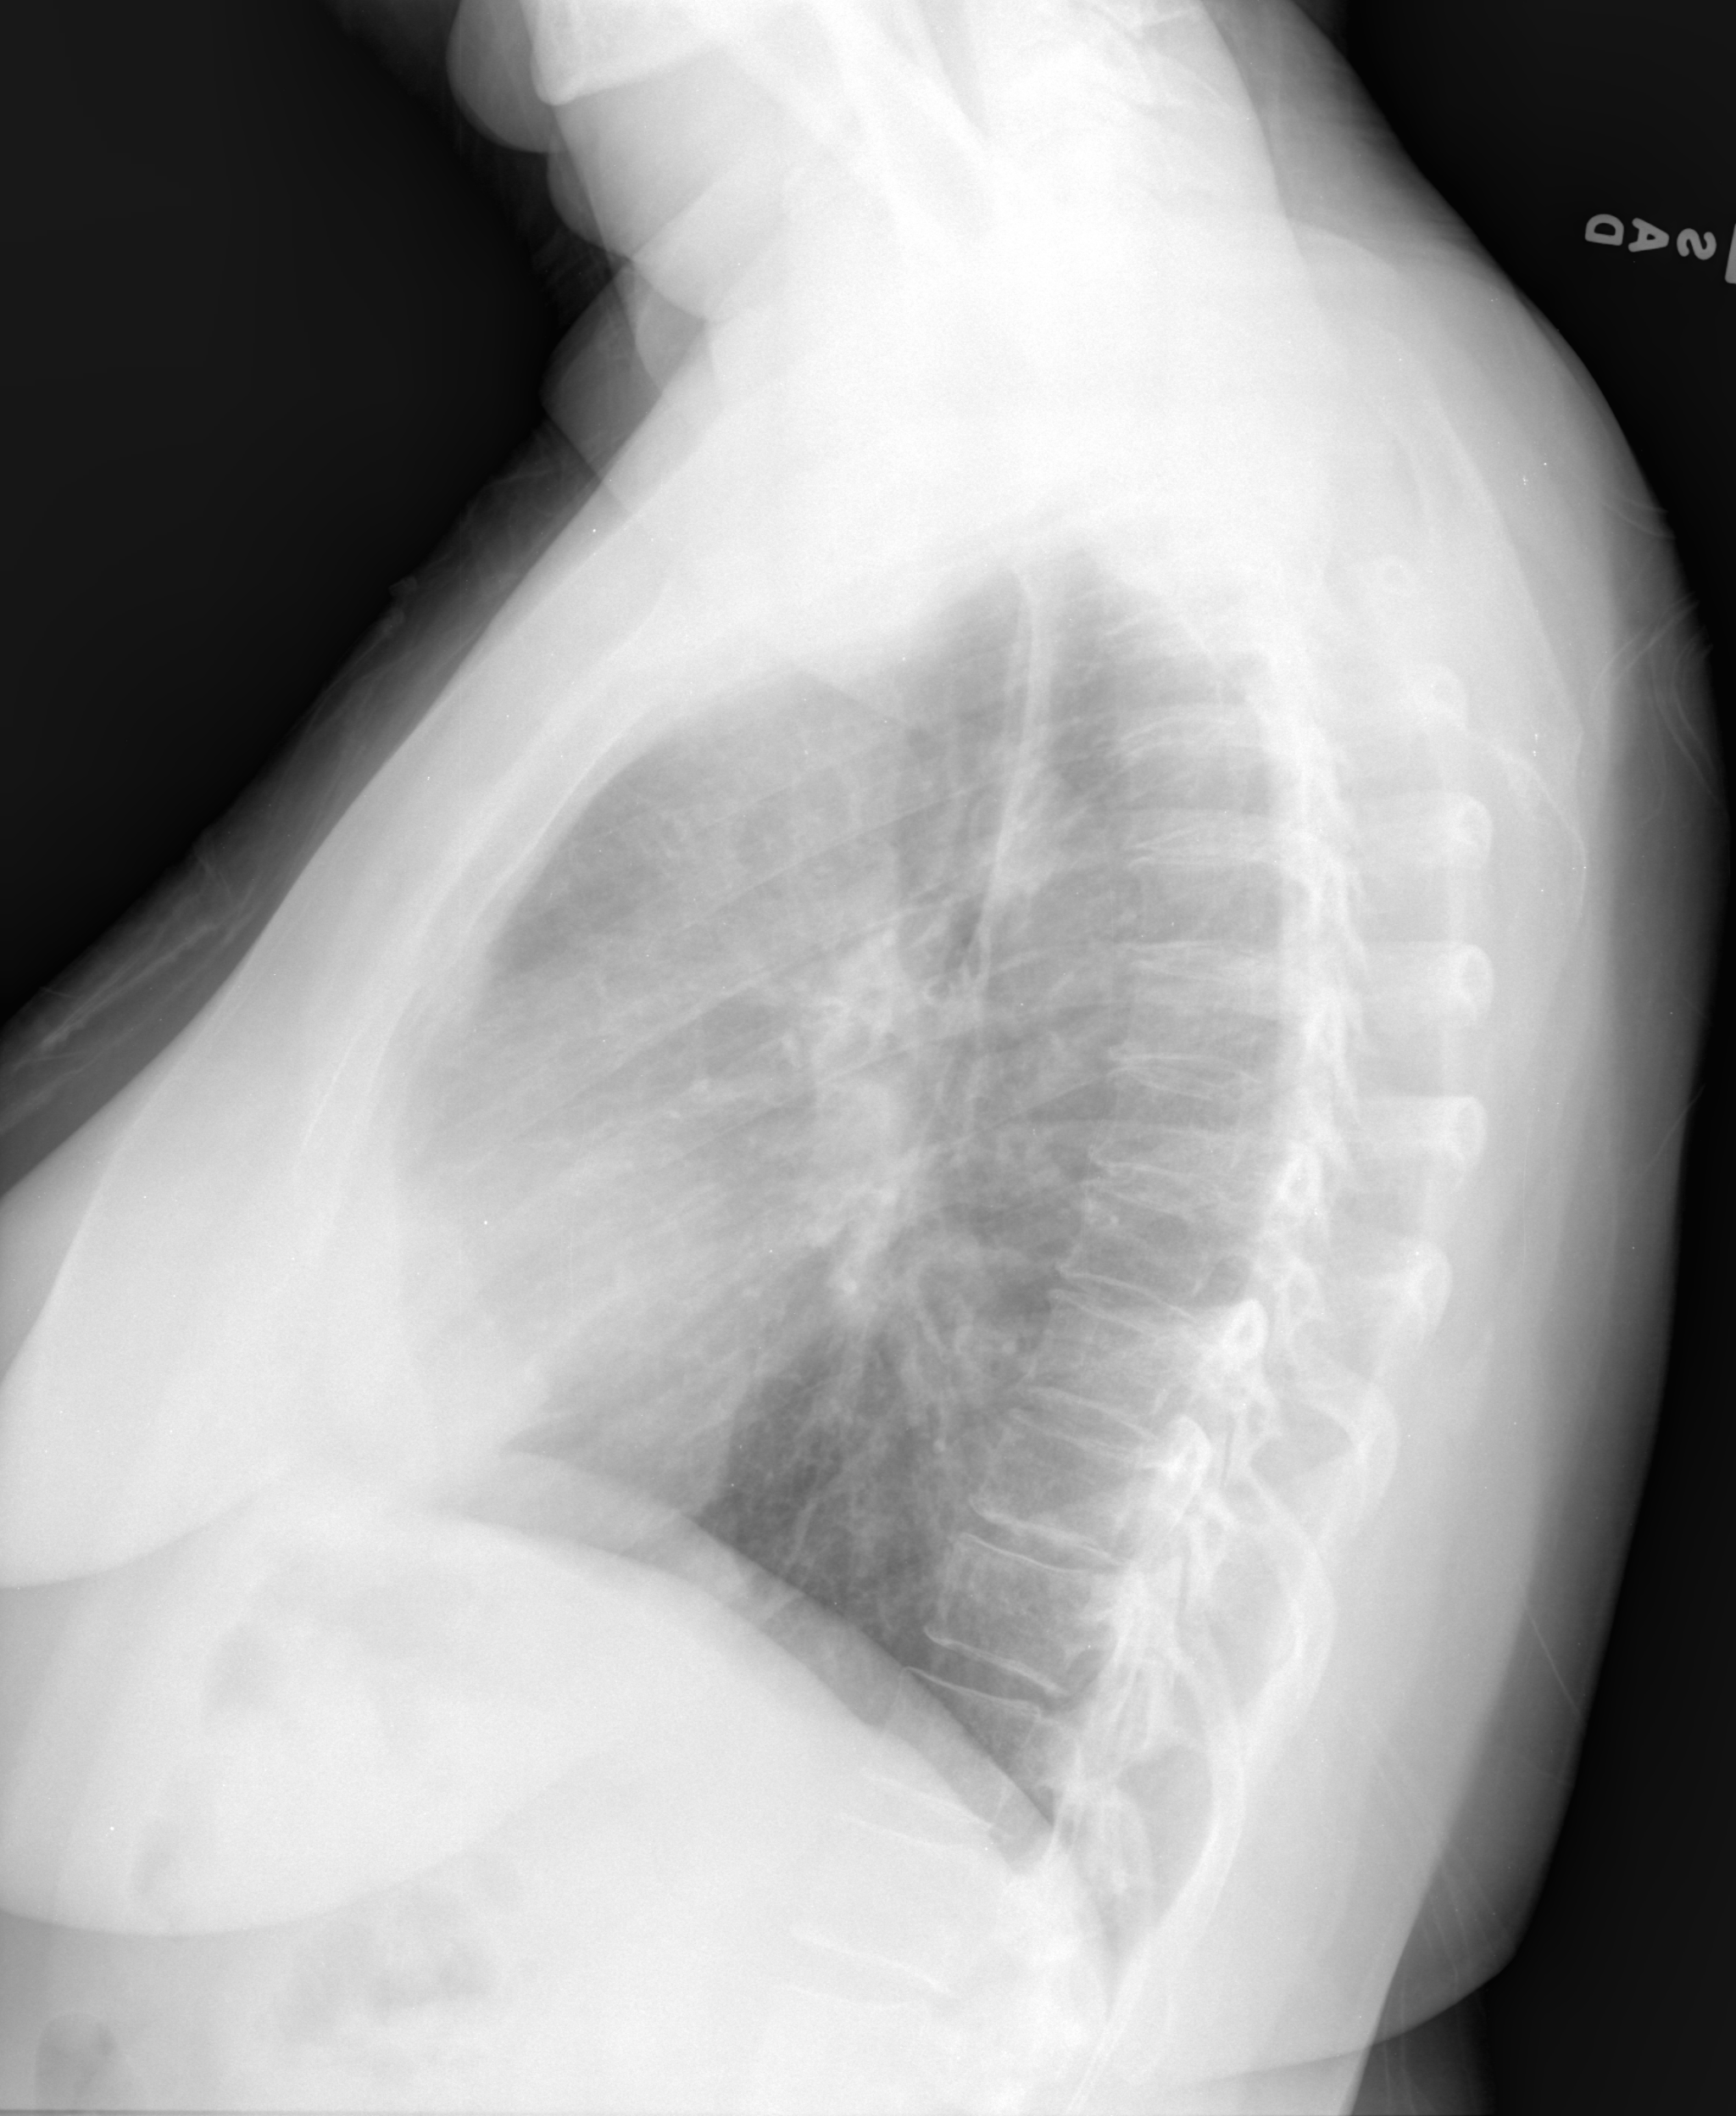

In [93]:
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, display
import matplotlib.cm as cm

model_builder = tf.keras.applications.vgg16.VGG16
img_size = (224, 224)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
decode_predictions = tf.keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_conv3"

# The local path to our target image
img_path ="/kaggle/input/chest-xrays-indiana-university/images/images_normalized/100_IM-0002-2001.dcm.png"

display(Image(img_path))

In [94]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Predicted: [('n01968897', 'chambered_nautilus', 11.700229)]


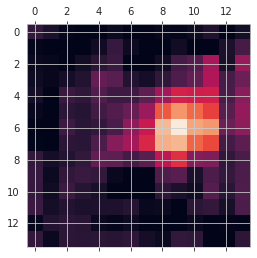

In [95]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

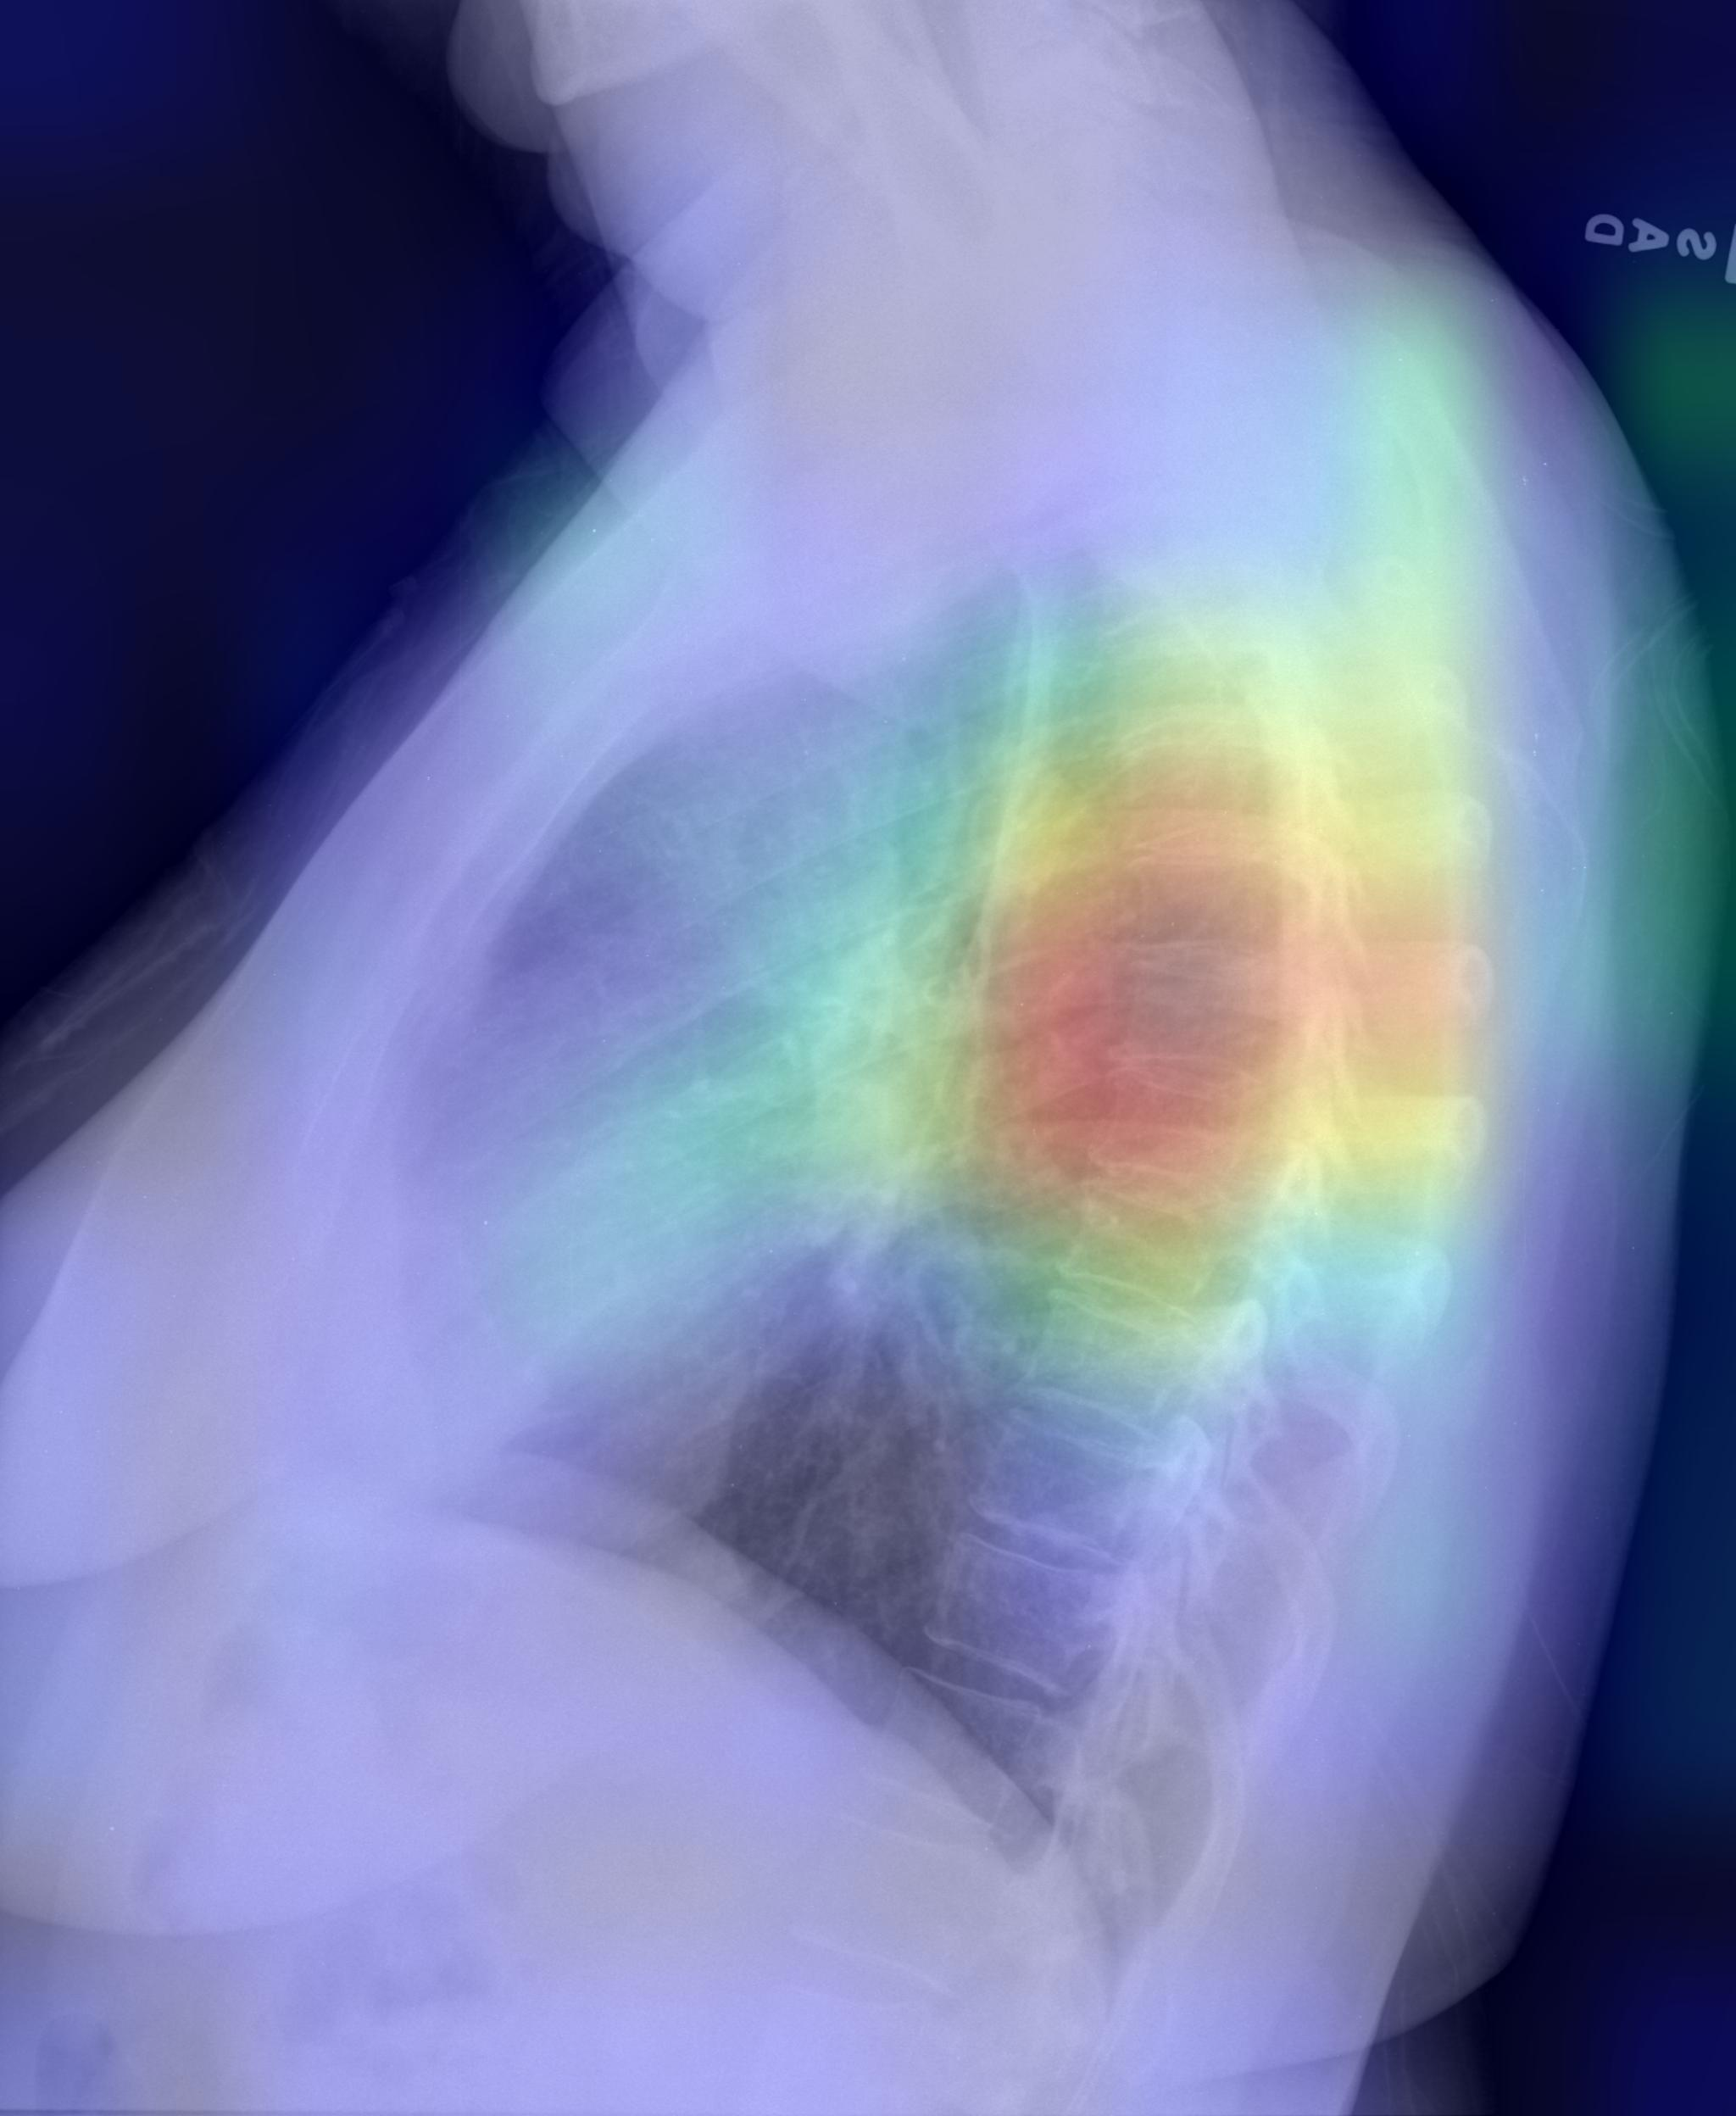

In [96]:
def save_and_display_gradcam(img_path, heatmap, cam_path="5.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)